In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H2.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [3]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
1079,2015,27
1748,2015,27
2137,2015,27
2374,2015,27
2434,2015,27
2633,2015,27
3355,2015,27
3434,2015,27
3495,2015,27
3679,2015,27


In [4]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

1079     201527
1748     201527
2137     201527
2374     201527
2434     201527
          ...  
11173    201735
11181    201735
11565    201735
11608    201735
11858    201735
Length: 12000, dtype: object


In [5]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
1079,0.0
1748,1.0
2137,0.0
2374,1.0
2434,0.0
2633,1.0
3355,1.0
3434,1.0
3495,1.0
3679,0.0


In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df3=pd.concat([df1, df2], axis = 1).T.drop_duplicates().T
df3
df3.columns = ['FullDate', 'IsCanceled']

In [8]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
1079,201527,0
2137,201527,0
2434,201527,0
3679,201527,0
4217,201527,0
4447,201527,0
5661,201527,0
7827,201527,0
8035,201527,0
11818,201527,0


In [9]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,11.0
201528,18.0
201529,32.0
201530,38.0
201531,24.0
201532,43.0
201533,54.0
201534,24.0
201535,34.0


In [10]:
tseries=df4['IsCanceled']
tseries

FullDate
201527    11.0
201528    18.0
201529    32.0
201530    38.0
201531    24.0
          ... 
201731    53.0
201732    50.0
201733    51.0
201734    38.0
201735    20.0
Name: IsCanceled, Length: 115, dtype: float64

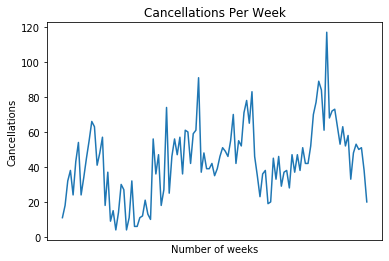

In [11]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [12]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,11.0
201528,18.0
201529,32.0
201530,38.0
201531,24.0
201532,43.0
201533,54.0
201534,24.0
201535,34.0


In [13]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.0619469 ],
       [0.12389381],
       [0.24778761],
       [0.30088496],
       [0.17699115],
       [0.34513274],
       [0.44247788],
       [0.17699115],
       [0.26548673],
       [0.36283186],
       [0.45132743],
       [0.54867257],
       [0.52212389],
       [0.32743363],
       [0.38938053],
       [0.46902655],
       [0.12389381],
       [0.2920354 ],
       [0.04424779],
       [0.09734513],
       [0.        ],
       [0.08849558],
       [0.2300885 ],
       [0.20353982],
       [0.        ],
       [0.0619469 ],
       [0.24778761],
       [0.01769912],
       [0.01769912],
       [0.0619469 ],
       [0.07079646],
       [0.15044248],
       [0.07964602],
       [0.05309735],
       [0.46017699],
       [0.28318584],
       [0.38053097],
       [0.12389381],
       [0.20353982],
       [0.61946903],
       [0.18584071],
       [0.37168142],
       [0.46017699],
       [0.38053097],
       [0.46902655],
       [0.28318584],
       [0.50442478],
       [0.495

In [15]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Test data partition
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 2
X_train, Y_train = create_dataset(train, previous)
X_test, Y_test = create_dataset(test, previous)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=150, batch_size=1, verbose=2)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/

Train on 89 samples
Epoch 1/150
89/89 - 2s - loss: 0.0628
Epoch 2/150
89/89 - 1s - loss: 0.0290
Epoch 3/150
89/89 - 1s - loss: 0.0208
Epoch 4/150
89/89 - 1s - loss: 0.0199
Epoch 5/150
89/89 - 1s - loss: 0.0196
Epoch 6/150
89/89 - 1s - loss: 0.0193
Epoch 7/150
89/89 - 1s - loss: 0.0192
Epoch 8/150
89/89 - 1s - loss: 0.0190
Epoch 9/150
89/89 - 1s - loss: 0.0191
Epoch 10/150
89/89 - 0s - loss: 0.0187
Epoch 11/150
89/89 - 1s - loss: 0.0189
Epoch 12/150
89/89 - 0s - loss: 0.0186
Epoch 13/150
89/89 - 1s - loss: 0.0184
Epoch 14/150
89/89 - 0s - loss: 0.0183
Epoch 15/150
89/89 - 1s - loss: 0.0183
Epoch 16/150
89/89 - 1s - loss: 0.0184
Epoch 17/150
89/89 - 1s - loss: 0.0183
Epoch 18/150
89/89 - 0s - loss: 0.0182
Epoch 19/150
89/89 - 1s - loss: 0.0181
Epoch 20/150
89/89 - 0s - loss: 0.0183
Epoch 21/150
89/89 - 1s - loss: 0.0180
Epoch 22/150
89/89 - 0s - loss: 0.0182
Epoch 23/150
89/89 - 1s - loss: 0.0180
Epoch 24/150
89/89 - 1s - loss: 0.0183
Epoch 25/150
89/89 - 1s - loss: 0.0181
Epoch 26/150
8

In [16]:
# Generate predictions
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

In [17]:
trainpred

array([[0.16764961],
       [0.23875378],
       [0.29996115],
       [0.2673058 ],
       [0.29483685],
       [0.38171512],
       [0.31123048],
       [0.26327664],
       [0.32928377],
       [0.38975197],
       [0.44469786],
       [0.46037656],
       [0.3904779 ],
       [0.35768712],
       [0.40307313],
       [0.29812372],
       [0.25661653],
       [0.20973843],
       [0.15105796],
       [0.12896132],
       [0.13308094],
       [0.21984003],
       [0.25542   ],
       [0.16292399],
       [0.12252201],
       [0.21821268],
       [0.18446364],
       [0.11071502],
       [0.12821782],
       [0.14608806],
       [0.1814096 ],
       [0.17852746],
       [0.14466822],
       [0.29938185],
       [0.3571729 ],
       [0.34128433],
       [0.2708149 ],
       [0.22072048],
       [0.40142965],
       [0.36587602],
       [0.30792493],
       [0.39523476],
       [0.39216334],
       [0.4006611 ],
       [0.3597086 ],
       [0.38554955],
       [0.44158012],
       [0.386

In [18]:
testpred

array([[0.372971  ],
       [0.44878697],
       [0.502679  ],
       [0.54064447],
       [0.5503344 ],
       [0.4912216 ],
       [0.56554997],
       [0.56163335],
       [0.48709017],
       [0.49719733],
       [0.47474432],
       [0.42638093],
       [0.43200982],
       [0.42350155],
       [0.41550064],
       [0.3523637 ],
       [0.33655322],
       [0.39104098],
       [0.39408427],
       [0.3898307 ]], dtype=float32)

In [19]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
testpred = scaler.inverse_transform(testpred)
Y_test = scaler.inverse_transform([Y_test])
predictions = testpred

In [20]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], testpred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.98 RMSE
Test Score: 18.06 RMSE


In [21]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [22]:
# Test predictions
testpredPlot = np.empty_like(df)
testpredPlot[:, :] = np.nan
testpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = testpred

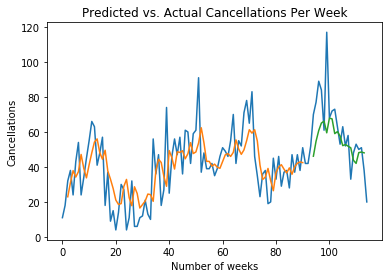

In [23]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
testpred, =plt.plot(testpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.show()

In [24]:
Y_test=Y_test.reshape(-1)
Y_test.shape
Y_test=pd.Series(Y_test)

In [25]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [26]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [27]:
mda(Y_test, predictions)

0.9